# Preliminary 1. Non linear correlations
<img src='https://images.unsplash.com/photo-1528067753492-69dda1cd56df?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NXx8Y3VydmV8ZW58MHx8MHx8&auto=format&fit=crop&w=800&q=60' width=300 height=300>
https://towardsdatascience.com/non-linear-correlation-matrix-the-much-needed-technique-which-nobody-talks-about-132bc02ce632

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn

## Anscombe's quartet
Anscombe's quartet is a group of datasets (x, y) that have the same mean, standard deviation, and regression line, but which are qualitatively different.

In [2]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [13]:
df.groupby('dataset')['x'].agg(['mean', 'var'])

,mean,var
dataset,,
I,9.0,11.0
II,9.0,11.0
III,9.0,11.0
IV,9.0,11.0


In [22]:
for i, g in df.groupby('dataset'):
    corr = g['x'].corr(g['y'])
    print(f'{i} 그룹 : x y 상관관계 {corr}')

I 그룹 : x y 상관관계 0.81642051634484
II 그룹 : x y 상관관계 0.8162365060002428
III 그룹 : x y 상관관계 0.8162867394895984
IV 그룹 : x y 상관관계 0.8165214368885028


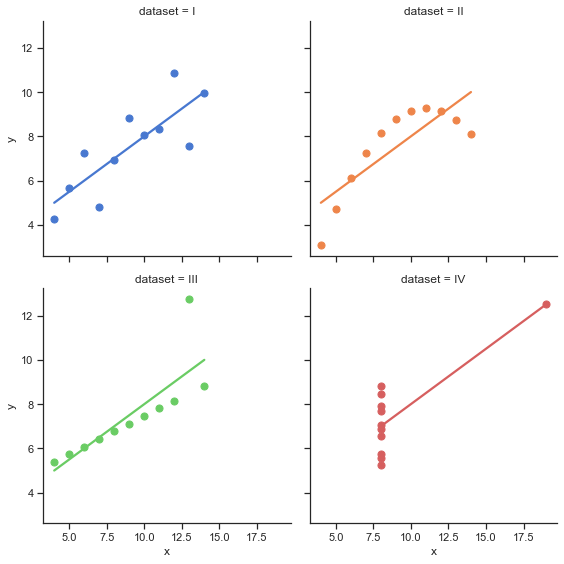

In [6]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

- https://www.autodeskresearch.com/publications/samestats 

- https://www.tableau.com/ko-kr/learn/articles/best-beautiful-data-visualization-examples

In [12]:
from sklearn.datasets import fetch_openml

In [86]:
data = fetch_openml(name='autos')
data.url
data.keys()
df = pd.DataFrame(np.c_[data.data, data.target], columns= data.feature_names + ['target'])
df.head()

'https://www.openml.org/d/9'

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,target
0,NaN,0.0,1.0,0.0,1.0,4.0,2.0,0.0,88.6,168.8,...,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,3
1,NaN,0.0,1.0,0.0,1.0,4.0,2.0,0.0,88.6,168.8,...,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,3
2,NaN,0.0,1.0,0.0,1.0,3.0,2.0,0.0,94.5,171.2,...,5.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1
3,164.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,99.8,176.6,...,5.0,3.19,3.4,10.0,102.0,5500.0,24.0,30.0,13950.0,2
4,164.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,99.4,176.6,...,5.0,3.19,3.4,8.0,115.0,5500.0,18.0,22.0,17450.0,2


<AxesSubplot:>

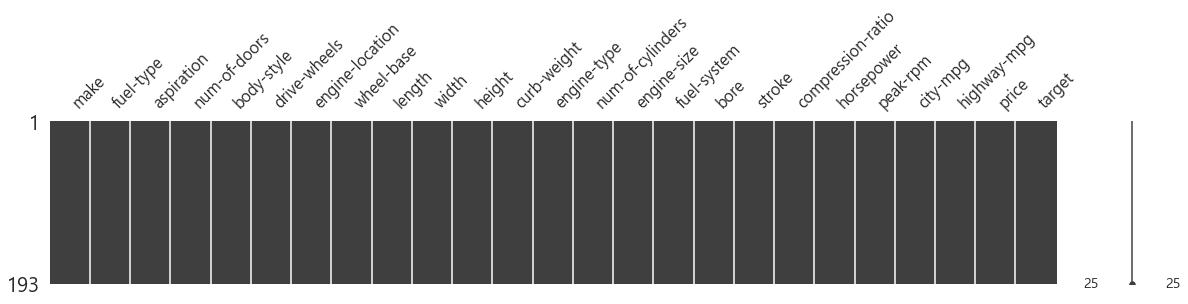

In [91]:
import missingno as msno
msno.matrix(df, figsize=(20,3))

In [88]:
del df['normalized-losses']

In [90]:
df.dropna(inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   make               193 non-null    object
 1   fuel-type          193 non-null    object
 2   aspiration         193 non-null    object
 3   num-of-doors       193 non-null    object
 4   body-style         193 non-null    object
 5   drive-wheels       193 non-null    object
 6   engine-location    193 non-null    object
 7   wheel-base         193 non-null    object
 8   length             193 non-null    object
 9   width              193 non-null    object
 10  height             193 non-null    object
 11  curb-weight        193 non-null    object
 12  engine-type        193 non-null    object
 13  num-of-cylinders   193 non-null    object
 14  engine-size        193 non-null    object
 15  fuel-system        193 non-null    object
 16  bore               193 non-null    object
 1

In [93]:
df = df.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               193 non-null    float64
 1   fuel-type          193 non-null    float64
 2   aspiration         193 non-null    float64
 3   num-of-doors       193 non-null    float64
 4   body-style         193 non-null    float64
 5   drive-wheels       193 non-null    float64
 6   engine-location    193 non-null    float64
 7   wheel-base         193 non-null    float64
 8   length             193 non-null    float64
 9   width              193 non-null    float64
 10  height             193 non-null    float64
 11  curb-weight        193 non-null    float64
 12  engine-type        193 non-null    float64
 13  num-of-cylinders   193 non-null    float64
 14  engine-size        193 non-null    float64
 15  fuel-system        193 non-null    float64
 16  bore               193 non

In [94]:
df.corr()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,target
make,1.000000,-0.119295,0.082330,-0.144574,-0.145449,-0.021139,0.051675,0.063872,0.095924,-0.014070,...,0.144899,0.231089,-0.218574,0.144310,-0.067402,-0.195030,0.055994,0.049695,-0.168908,-0.112904
fuel-type,-0.119295,1.000000,-0.431268,0.175294,0.153892,-0.151650,0.041523,-0.310196,-0.209882,-0.245662,...,0.039686,-0.052378,-0.253837,-0.984951,0.156712,0.477885,-0.242396,-0.174032,-0.115440,0.185730
aspiration,0.082330,-0.431268,1.000000,-0.046026,-0.021529,0.111810,-0.059141,0.263988,0.249014,0.323643,...,0.281694,0.247400,0.232950,0.332095,0.255771,-0.193908,-0.205628,-0.256251,0.186073,-0.042855
num-of-doors,-0.144574,0.175294,-0.046026,1.000000,0.428104,0.086999,0.147758,-0.447460,-0.400636,-0.235345,...,0.006600,-0.127156,0.008421,-0.161471,0.097046,0.200355,0.068485,0.082160,-0.046460,0.659122
body-style,-0.145449,0.153892,-0.021529,0.428104,1.000000,-0.083089,-0.126636,-0.372715,-0.387936,-0.223180,...,-0.062323,-0.245730,0.003913,-0.155225,-0.090728,0.110105,0.149392,0.172465,-0.185076,0.380099
drive-wheels,-0.021139,-0.151650,0.111810,0.086999,-0.083089,1.000000,0.153819,0.488736,0.518274,0.494133,...,0.462793,0.483190,0.097330,0.136128,0.551539,-0.086286,-0.454564,-0.457877,0.596227,-0.101389
engine-location,0.051675,0.041523,-0.059141,0.147758,-0.126636,0.153819,1.000000,-0.192972,-0.054785,-0.052672,...,0.108847,0.189345,-0.139339,-0.020386,0.343559,0.215106,-0.164217,-0.106960,0.330848,0.224529
wheel-base,0.063872,-0.310196,0.263988,-0.447460,-0.372715,0.488736,-0.192972,1.000000,0.879307,0.818465,...,0.392578,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951,-0.536516
length,0.095924,-0.209882,0.249014,-0.400636,-0.387936,0.518274,-0.054785,0.879307,1.000000,0.857368,...,0.561947,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928,-0.363194
width,-0.014070,-0.245662,0.323643,-0.235345,-0.223180,0.494133,-0.052672,0.818465,0.857368,1.000000,...,0.521886,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649,-0.247741


In [95]:
df.corr().fillna(0)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,target
make,1.000000,-0.119295,0.082330,-0.144574,-0.145449,-0.021139,0.051675,0.063872,0.095924,-0.014070,...,0.144899,0.231089,-0.218574,0.144310,-0.067402,-0.195030,0.055994,0.049695,-0.168908,-0.112904
fuel-type,-0.119295,1.000000,-0.431268,0.175294,0.153892,-0.151650,0.041523,-0.310196,-0.209882,-0.245662,...,0.039686,-0.052378,-0.253837,-0.984951,0.156712,0.477885,-0.242396,-0.174032,-0.115440,0.185730
aspiration,0.082330,-0.431268,1.000000,-0.046026,-0.021529,0.111810,-0.059141,0.263988,0.249014,0.323643,...,0.281694,0.247400,0.232950,0.332095,0.255771,-0.193908,-0.205628,-0.256251,0.186073,-0.042855
num-of-doors,-0.144574,0.175294,-0.046026,1.000000,0.428104,0.086999,0.147758,-0.447460,-0.400636,-0.235345,...,0.006600,-0.127156,0.008421,-0.161471,0.097046,0.200355,0.068485,0.082160,-0.046460,0.659122
body-style,-0.145449,0.153892,-0.021529,0.428104,1.000000,-0.083089,-0.126636,-0.372715,-0.387936,-0.223180,...,-0.062323,-0.245730,0.003913,-0.155225,-0.090728,0.110105,0.149392,0.172465,-0.185076,0.380099
drive-wheels,-0.021139,-0.151650,0.111810,0.086999,-0.083089,1.000000,0.153819,0.488736,0.518274,0.494133,...,0.462793,0.483190,0.097330,0.136128,0.551539,-0.086286,-0.454564,-0.457877,0.596227,-0.101389
engine-location,0.051675,0.041523,-0.059141,0.147758,-0.126636,0.153819,1.000000,-0.192972,-0.054785,-0.052672,...,0.108847,0.189345,-0.139339,-0.020386,0.343559,0.215106,-0.164217,-0.106960,0.330848,0.224529
wheel-base,0.063872,-0.310196,0.263988,-0.447460,-0.372715,0.488736,-0.192972,1.000000,0.879307,0.818465,...,0.392578,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951,-0.536516
length,0.095924,-0.209882,0.249014,-0.400636,-0.387936,0.518274,-0.054785,0.879307,1.000000,0.857368,...,0.561947,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928,-0.363194
width,-0.014070,-0.245662,0.323643,-0.235345,-0.223180,0.494133,-0.052672,0.818465,0.857368,1.000000,...,0.521886,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649,-0.247741


<AxesSubplot:>

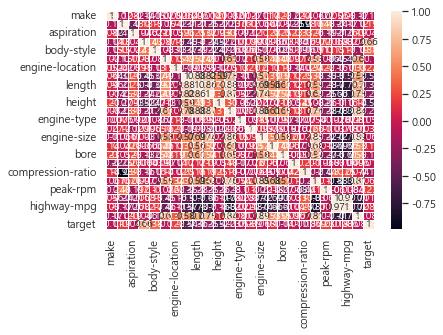

In [96]:
sns.heatmap(data = df.corr().fillna(0), annot = True, linewidths=.5)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0.5, 0, 'make'),
  Text(1.5, 0, 'fuel-type'),
  Text(2.5, 0, 'aspiration'),
  Text(3.5, 0, 'num-of-doors'),
  Text(4.5, 0, 'body-style'),
  Text(5.5, 0, 'drive-wheels'),
  Text(6.5, 0, 'engine-location'),
  Text(7.5, 0, 'wheel-base'),
  Text(8.5, 0, 'length'),
  Text(9.5, 0, 'width'),
  Text(10.5, 0, 'height'),
  Text(11.5, 0, 'curb-weight'),
  Text(12.5, 0, 'engine-type'),
  Text(13.5, 0, 'num-of-cylinders'),
  Text(14.5, 0, 'engine-size'),
  Text(15.5, 0, 'fuel-system'),
  Text(16.5, 0, 'bore'),
  Text(17.5, 0, 'stroke'),
  Text(18.5, 0, 'compression-ratio'),
  Text(19.5, 0, 'horsepower'),
  Text(20.5, 0, 'peak-rpm'),
  Text(21.5, 0, 'city-mpg'),
  Text(22.5, 0, 'highway-mpg'),
  Text(23.5, 0, 'price'),
  Text(24.5, 0, 'target')])

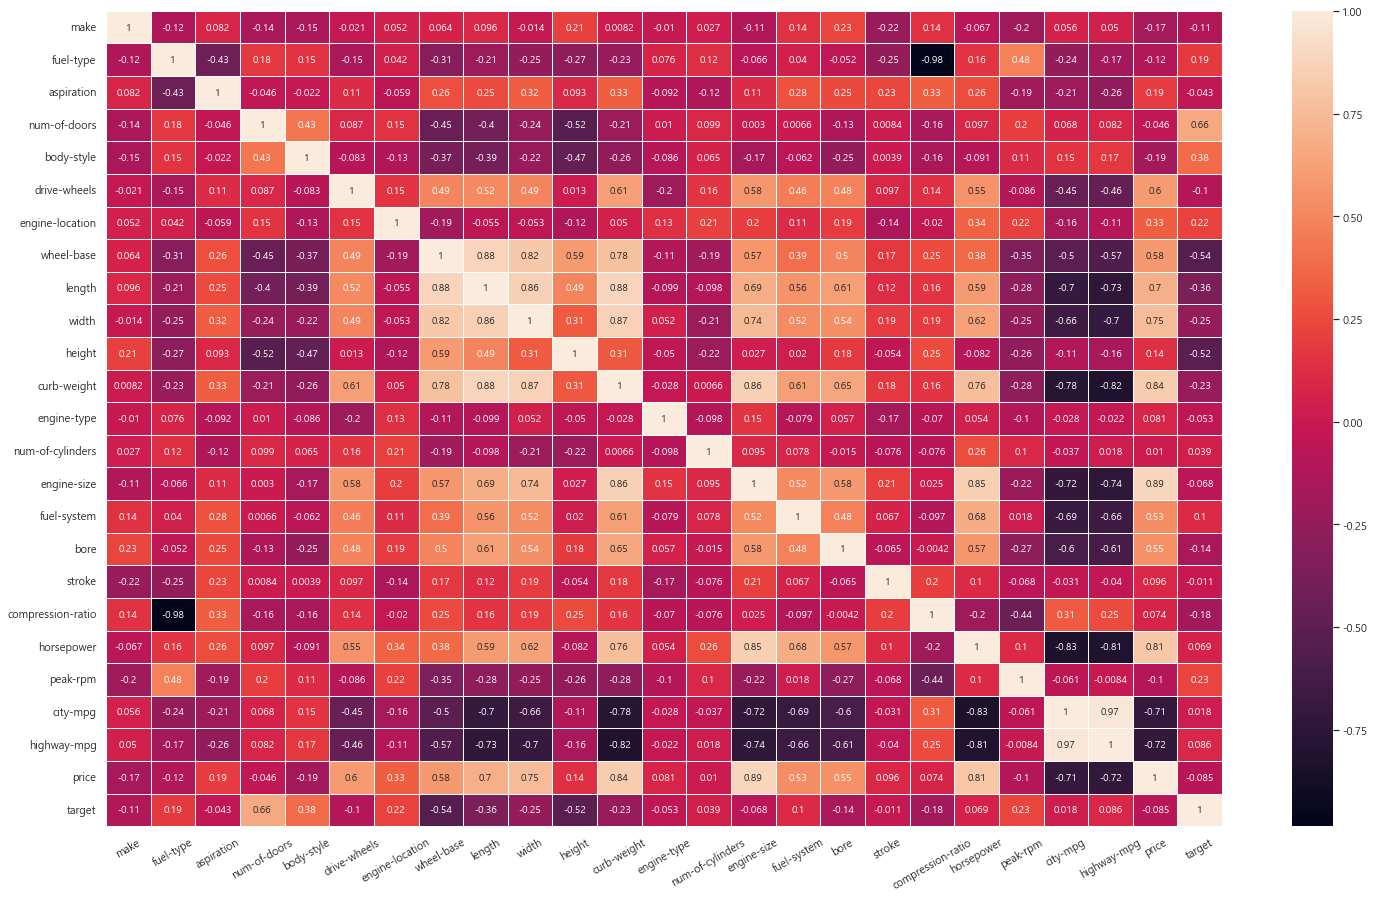

In [97]:
fig, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(data = df.corr().fillna(0), annot = True, linewidths=.5, ax=ax)
plt.xticks(rotation=30)

In [98]:
df['engine-size'].corr(df['curb-weight'])

0.8571882102751056

### The correlation coefficient between engine size and weight is about 0.85. 
### This means that there is a strong positive correlation between the two fields. In other words, this means that as engine size increases, weight also linearly increases.

In [99]:
get_ipython().run_line_magic('matplotlib', 'inline') # 시각화 그림 자동 화면 출력
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [100]:
df.isnull().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
target               0
dtype: int64

<AxesSubplot:>

Text(0.5, 1.0, 'X와 y의 상관관계')

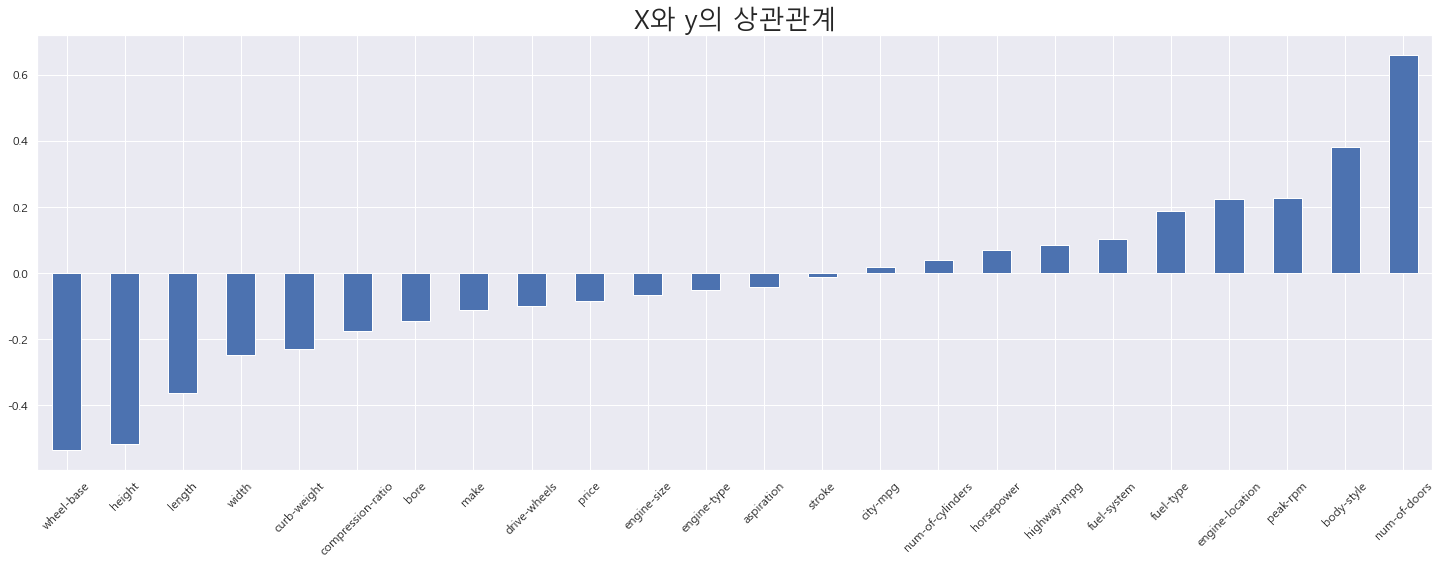

In [101]:
X = df.drop('target', axis=1)
y = df['target']
(X.corrwith(y).sort_values().plot.bar(figsize = (25, 8),
                                      fontsize = 12, rot = 45, grid = True))
plt.title('X와 y의 상관관계', fontsize = 26)

변수 make의 종속변수(target)과 선형상관계수는 -0.11


<AxesSubplot:xlabel='make', ylabel='price'>

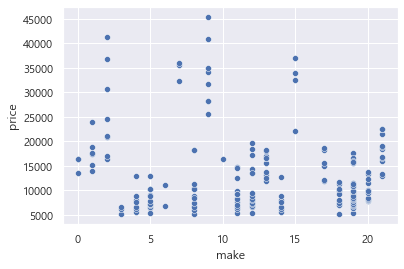

변수 fuel-type의 종속변수(target)과 선형상관계수는 0.19


<AxesSubplot:xlabel='fuel-type', ylabel='price'>

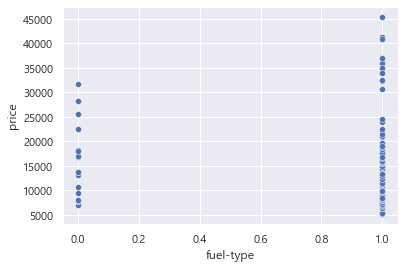

변수 aspiration의 종속변수(target)과 선형상관계수는 -0.04


<AxesSubplot:xlabel='aspiration', ylabel='price'>

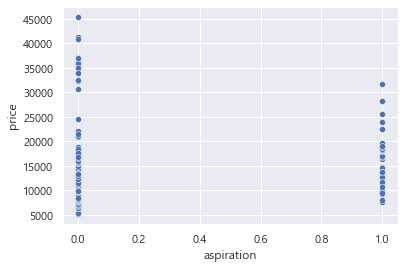

변수 num-of-doors의 종속변수(target)과 선형상관계수는 0.66


<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

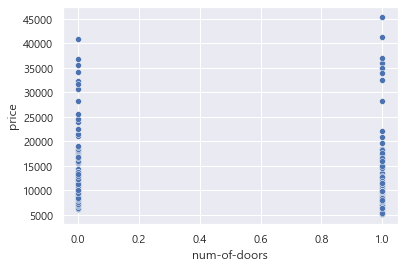

변수 body-style의 종속변수(target)과 선형상관계수는 0.38


<AxesSubplot:xlabel='body-style', ylabel='price'>

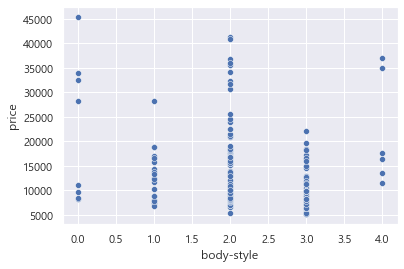

변수 drive-wheels의 종속변수(target)과 선형상관계수는 -0.1


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

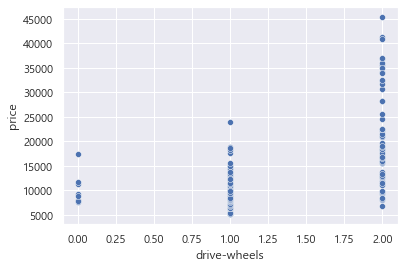

변수 engine-location의 종속변수(target)과 선형상관계수는 0.22


<AxesSubplot:xlabel='engine-location', ylabel='price'>

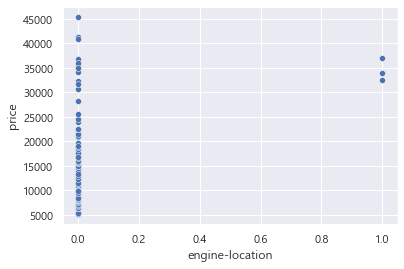

변수 wheel-base의 종속변수(target)과 선형상관계수는 -0.54


<AxesSubplot:xlabel='wheel-base', ylabel='price'>

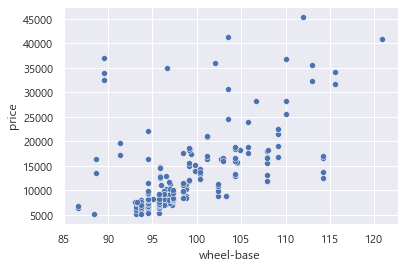

변수 length의 종속변수(target)과 선형상관계수는 -0.36


<AxesSubplot:xlabel='length', ylabel='price'>

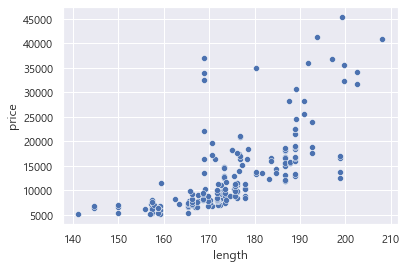

변수 width의 종속변수(target)과 선형상관계수는 -0.25


<AxesSubplot:xlabel='width', ylabel='price'>

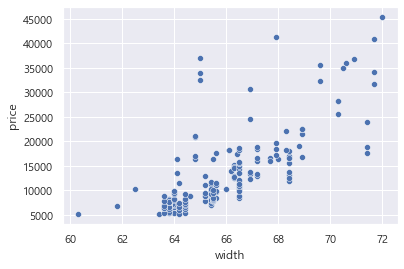

변수 height의 종속변수(target)과 선형상관계수는 -0.52


<AxesSubplot:xlabel='height', ylabel='price'>

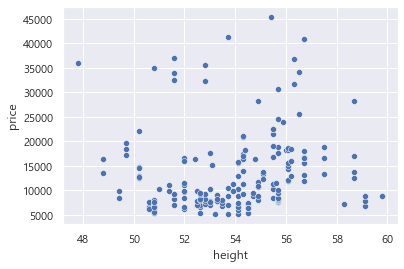

변수 curb-weight의 종속변수(target)과 선형상관계수는 -0.23


<AxesSubplot:xlabel='curb-weight', ylabel='price'>

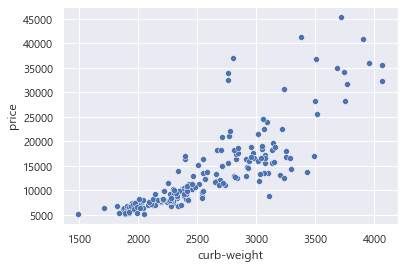

변수 engine-type의 종속변수(target)과 선형상관계수는 -0.05


<AxesSubplot:xlabel='engine-type', ylabel='price'>

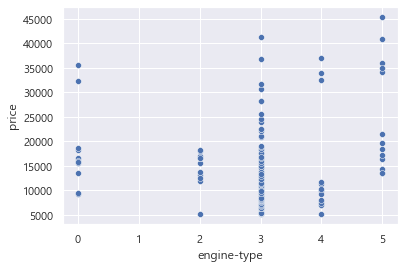

변수 num-of-cylinders의 종속변수(target)과 선형상관계수는 0.04


<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

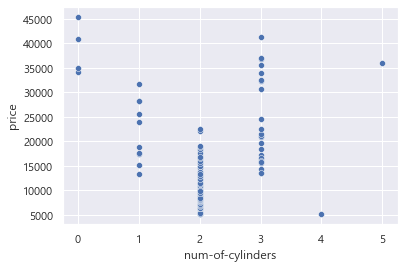

변수 engine-size의 종속변수(target)과 선형상관계수는 -0.07


<AxesSubplot:xlabel='engine-size', ylabel='price'>

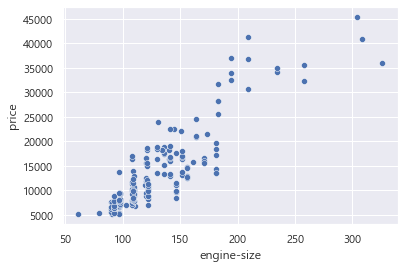

변수 fuel-system의 종속변수(target)과 선형상관계수는 0.1


<AxesSubplot:xlabel='fuel-system', ylabel='price'>

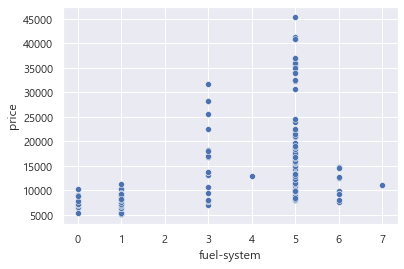

변수 bore의 종속변수(target)과 선형상관계수는 -0.14


<AxesSubplot:xlabel='bore', ylabel='price'>

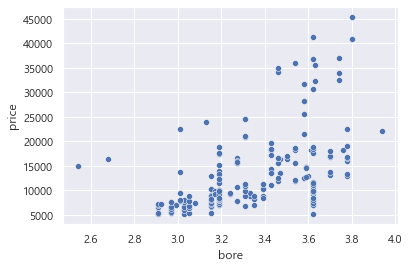

변수 stroke의 종속변수(target)과 선형상관계수는 -0.01


<AxesSubplot:xlabel='stroke', ylabel='price'>

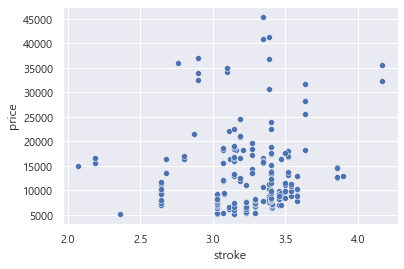

변수 compression-ratio의 종속변수(target)과 선형상관계수는 -0.18


<AxesSubplot:xlabel='compression-ratio', ylabel='price'>

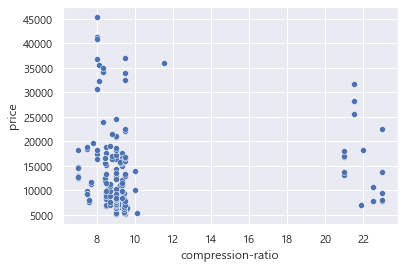

변수 horsepower의 종속변수(target)과 선형상관계수는 0.07


<AxesSubplot:xlabel='horsepower', ylabel='price'>

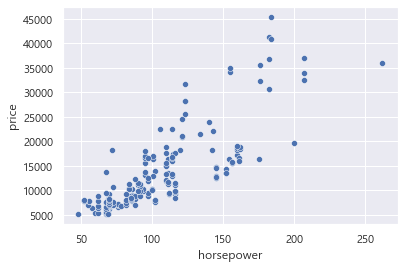

변수 peak-rpm의 종속변수(target)과 선형상관계수는 0.23


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

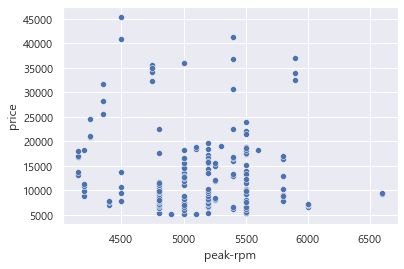

변수 city-mpg의 종속변수(target)과 선형상관계수는 0.02


<AxesSubplot:xlabel='city-mpg', ylabel='price'>

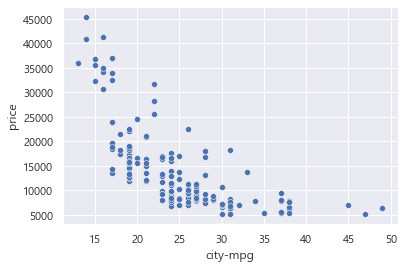

변수 highway-mpg의 종속변수(target)과 선형상관계수는 0.09


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

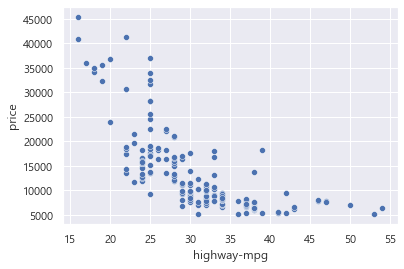

변수 price의 종속변수(target)과 선형상관계수는 -0.08


<AxesSubplot:xlabel='price', ylabel='price'>

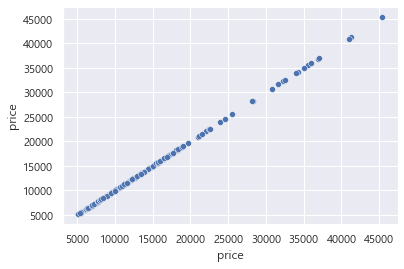

In [102]:
for var in df.drop('target', axis=1).columns:
    correlation = df[var].corr(df['target']).round(2)
    print(f'변수 {var}의 종속변수(target)과 선형상관계수는 {correlation}')
    sns.scatterplot(data=df, x=var, y='price'); plt.show()

변수 num-of-doors의 종속변수(target)과 선형상관계수는 0.66


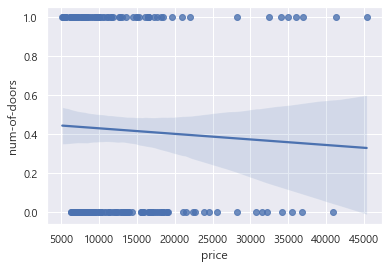

변수 body-style의 종속변수(target)과 선형상관계수는 0.38


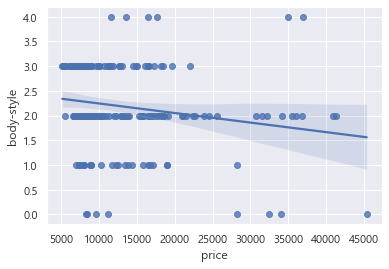

변수 wheel-base의 종속변수(target)과 선형상관계수는 -0.54


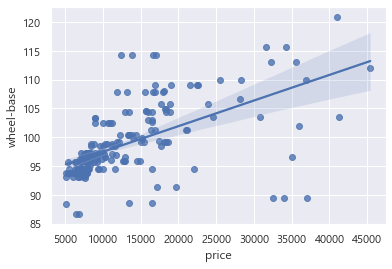

변수 length의 종속변수(target)과 선형상관계수는 -0.36


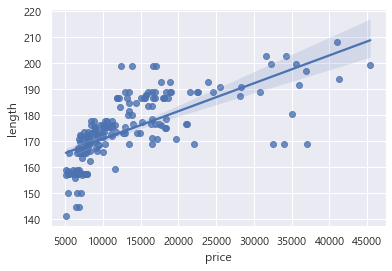

변수 height의 종속변수(target)과 선형상관계수는 -0.52


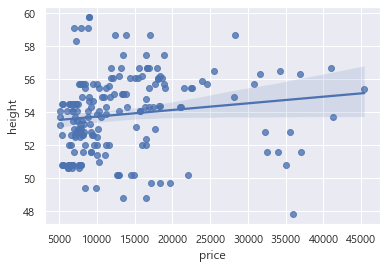

In [105]:
for var in df.drop('target', axis=1).columns:
    correlation = df[var].corr(df['target']).round(2)
    if abs(correlation) > 0.3:
        print(f'변수 {var}의 종속변수(target)과 선형상관계수는 {correlation}')
        ax = sns.regplot(data=df, x='price', y=var) # sns.relplot()
        plt.show()

In [69]:
df.columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'target'],
      dtype='object')

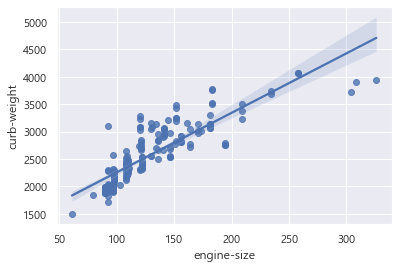

In [108]:
ax = sns.regplot(data=df, x='engine-size', y='curb-weight') # sns.relplot()